# World Devlopment Plot
This example shows how we can visualize data from a DataFrame to help us compare data over time.

In the plots below, each circle is a country, with its size indicating its population and its color indicating the continent.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl

In [2]:
# Plotting parameters
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (16, 9)
plt.rcParams['font.size'] = 20
size_scale = 1e-5
xlim = [200,100000]
ylim = [30, 90]
years_to_plot = [1962, 2007]

In [3]:
# Load entire dataset
data_file = 'data/gapminder_all.csv'
data = pd.read_csv(data_file)
data.columns

Index(['continent', 'country', 'gdpPercap_1952', 'gdpPercap_1957',
       'gdpPercap_1962', 'gdpPercap_1967', 'gdpPercap_1972', 'gdpPercap_1977',
       'gdpPercap_1982', 'gdpPercap_1987', 'gdpPercap_1992', 'gdpPercap_1997',
       'gdpPercap_2002', 'gdpPercap_2007', 'lifeExp_1952', 'lifeExp_1957',
       'lifeExp_1962', 'lifeExp_1967', 'lifeExp_1972', 'lifeExp_1977',
       'lifeExp_1982', 'lifeExp_1987', 'lifeExp_1992', 'lifeExp_1997',
       'lifeExp_2002', 'lifeExp_2007', 'pop_1952', 'pop_1957', 'pop_1962',
       'pop_1967', 'pop_1972', 'pop_1977', 'pop_1982', 'pop_1987', 'pop_1992',
       'pop_1997', 'pop_2002', 'pop_2007'],
      dtype='object')

In [4]:
# Unfortunately, the scatter-plot color doesn't take categories,
# so we update data to integers so they can be used as colors
continent_categorical = pd.Categorical(data['continent'])
data['continent_categorical'] = continent_categorical
data['continent_int'] = data.continent_categorical.cat.codes

# Continents, as listed in the Gapminder dataset
num_continents = continent_categorical.categories.size

Circle size indicates a country's population


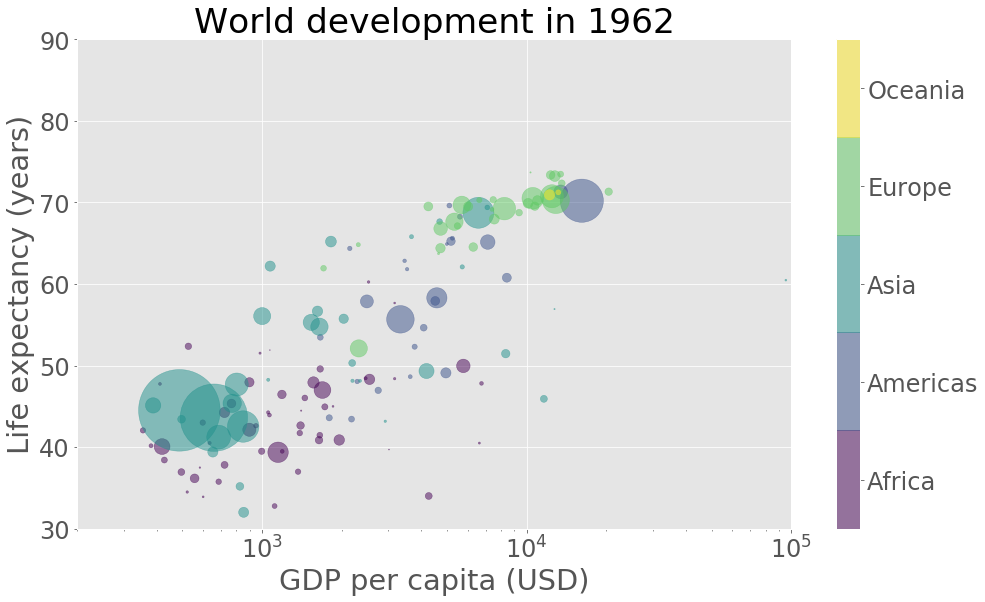

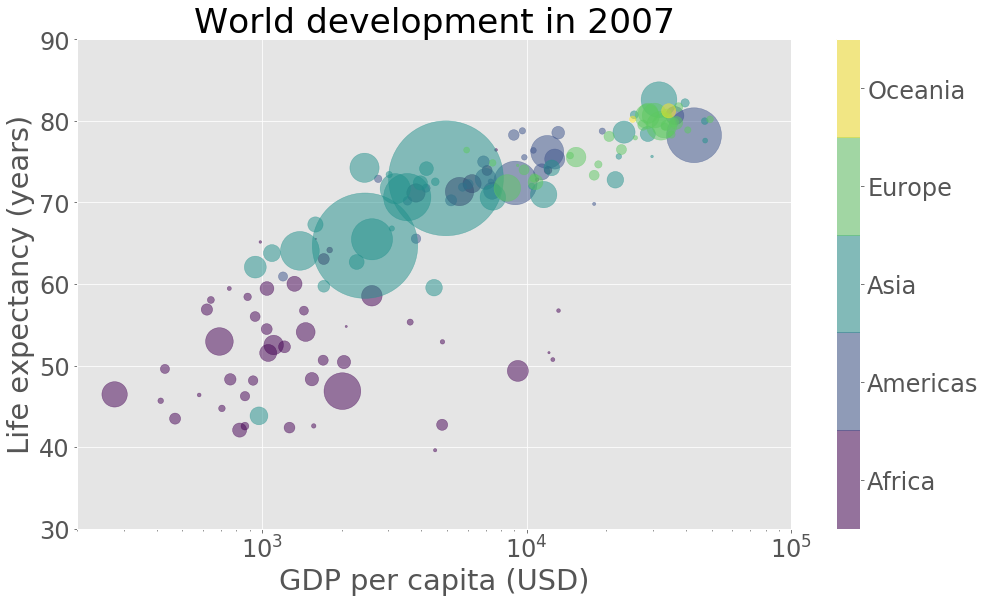

In [5]:
# Create a discrete color-map
cmap = mpl.cm.get_cmap('viridis', num_continents)
norm = mpl.colors.BoundaryNorm(np.arange(-0.5, num_continents), cmap.N)


for year in years_to_plot:
    ax = data.plot.scatter(x='gdpPercap_{}'.format(year), # feature to use for x-value
                           y='lifeExp_{}'.format(year), # feature to use for y-value
                           s=data['pop_{}'.format(year)] * size_scale, # feature to use for circle size
                           c='continent_int', # 'continent' column, converted to an integer
                           cmap=cmap,
                           norm=norm,
                           colorbar=False,
                           alpha=0.5)

    cbar = plt.colorbar(ax.collections[0], ticks=np.arange(5))
    cbar.ax.set_yticklabels(continent_categorical.categories)
    plt.xscale('log')
    plt.xlim(xlim)
    plt.ylim(ylim)
    plt.title('World development in {}'.format(year))
    plt.xlabel('GDP per capita (USD)')
    plt.ylabel('Life expectancy (years)')
    
print("Circle size indicates a country's population")